# Import Library

In [1]:
import pandas as pd
pd.options.display.max_columns = 50

# Load Dataset

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [40]:
# Tampilkan dimensi data
print(df.shape)
# Ada 7133 baris dan 22 kolom'''

(7113, 22)


In [41]:
# Tampilkan 5 data teratas
print(df.head(5))

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

In [45]:
# Tampilkan jumlah ID unik pelanggan
print(df.customerID.nunique())
# 1. nunique() -> digunakan untuk menghitung jumlah values yang unik
# 2. unique() -> digunakan untuk mengetahui value apa saja yang bersifat unik
# 3. Tnpa list -> akses feature tanpa list untuk menghitung jumlah feature tsb yang bersifat unik


6993


# Filter ID Number Format Benar

Syarat ID Number valid:
1. Panjang karakter 11-12
2. Hanya angka
3. Diawali dg 45 di 2 digit pertama

In [43]:
# Gunakan REGEX untuk mengetahui nilai valid
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')

# Buat kolom bantuan 'valid_id' untuk menandai ID mana saja yang bernilai sesuai syarat. Maknanya id akan di cek 45 adalah nilai awal dan diikuti 9/10 angka dibelakangnya. Menggunakan astype(str) -> memastika customer_ID diperlakukan sebagai string.

In [44]:
# Drop baris2 yang ber id tidak sesuai berdasarkan bantuan valid_id columns
df = (df[df['valid_id'] == True]).drop('valid_id', axis=1)

In [46]:
#Lihat hasilnya:

print('Hasil jumlah ID Customer yang valid: ', df['customerID'].count())

Hasil jumlah ID Customer yang valid:  7006


# Filter Duplikat Data

In [47]:
# Drop Duplicat Rows
df = df.drop_duplicates()

In [10]:
print(df.shape)

(6999, 22)


In [48]:
# Drop Duplikat data berdasarkan waktu inserting yang sama

df = df.sort_values('UpdatedAt',ascending=False).drop_duplicates('customerID')
# Hanya satu baris untuk setiap nilai 'customerID' yang akan disimpan di DataFrame, sisanya (duplikatnya) akan dihapus.

In [49]:
# Lihat hasil customer_ID yang telah dibersihkan datanya
print('Jumlah ID Customer after clening: ',df['customerID'].count())

Jumlah ID Customer after clening:  6993


# Mengatasi Rows Missing Value

Mendeteksi rows yang tidak terdeteksi apakah churn atau tidak. Menggunakan isnull() untuk deteksi dan dropna() untuk drop missing value

In [50]:
# Perlihatkan total missing value pada kolom churn
print('Total missing values kolom Churn', df['Churn'].isnull().sum())

# Ada 43 baris missing values

Total missing values kolom Churn 43


In [51]:
# Drop semua baris yang kosong pada kolom Churn
df.dropna(subset=['Churn'], inplace=True)

print('Dimensi after drop missing values: ', df.shape)

Dimensi after drop missing values:  (6950, 22)


## Mengatasi Missing Values dengan pengisian nilai tertentu

1. Modeller meminta kolom Tenure yang kosong diisi dengan angka 11
2. Untuk variabel numerik lain yang memiliki miss value diisi dengan median dari masing-masing variabel

In [52]:
# Cek status missing values di semua kolom
print('Status Missing Values: ', df.isnull().values.any())

# Hasil = True -> berarti ada kolom2 yang memiliki Missing value

Status Missing Values:  True


In [53]:
# Tampilkan jumlah missing values masing2 kolom:
print('\nJumlah Missing Values each columns: ')
print(df.isnull().sum().sort_values(ascending=False)) # Dari terbesar ke terkecil


Jumlah Missing Values each columns: 
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [17]:
df22 = df2.copy() # Takut keubah semua cuyyyyy

In [54]:
# Handling missing value kolom Tenure
df['tenure'] = df['tenure'].fillna(11)

In [55]:
# Handling num vars
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    median = df[col_name].median()
    df[col_name] = df[col_name].fillna(median)

In [56]:
# Tampilkan jumlah missing values after handling
print('\nJumlah Missing Values After Handling: ')
print(df.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values After Handling: 
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


# Mengatasi Outlier

Mendeteksi outliers dengan boxplot

In [57]:
# Deskripsikan sebaran data sebelum divisualisasikan.
print('\nSebaran data Telco: ')
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Sebaran data Telco: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


In [22]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

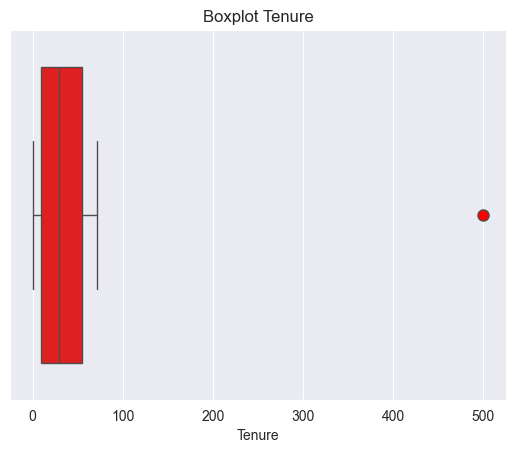

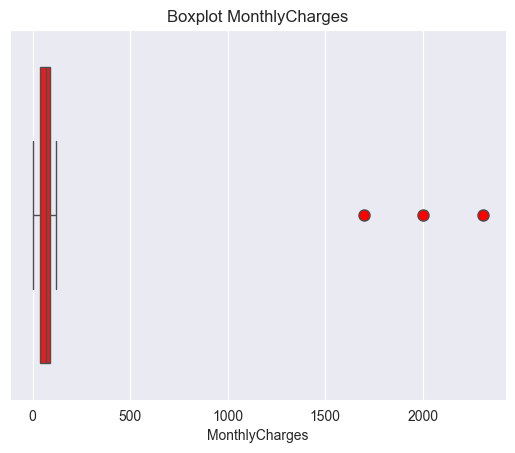

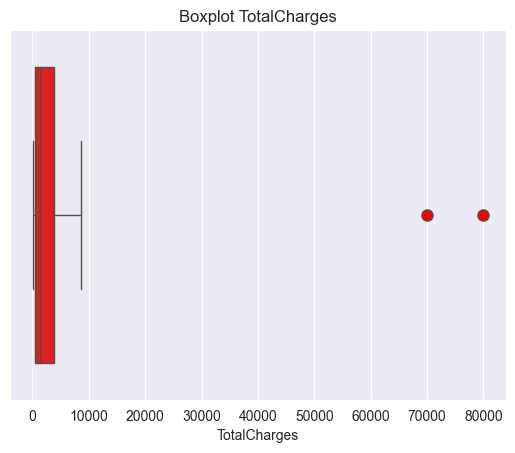

In [58]:
# Buat Boxplot untuk masing2 dari ketiga Variabel:
# Tenure
plt.figure()
sns.boxplot(x=df['tenure'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot Tenure')
plt.xlabel('Tenure')
plt.show()

# MonthlyCharges
plt.figure()
sns.boxplot(x=df['MonthlyCharges'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()

# TotalCharges
plt.figure()
sns.boxplot(x=df['TotalCharges'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot TotalCharges')
plt.xlabel('TotalCharges')
plt.show()

## Mengatasi Outlier dengan Quantile dan mask

In [59]:
# Menangani outlier
# Proses outlier dengan batch calculation (lebih efisien & rapih)
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('\nNilai Maximum dari masing-masing Variabel adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variabel adalah: ')
print(minimum)

more_than = (df[['tenure', 'MonthlyCharges', 'TotalCharges']] > maximum)
lower_than = (df[['tenure', 'MonthlyCharges', 'TotalCharges']] < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Nilai Maximum dari masing-masing Variabel adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variabel adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


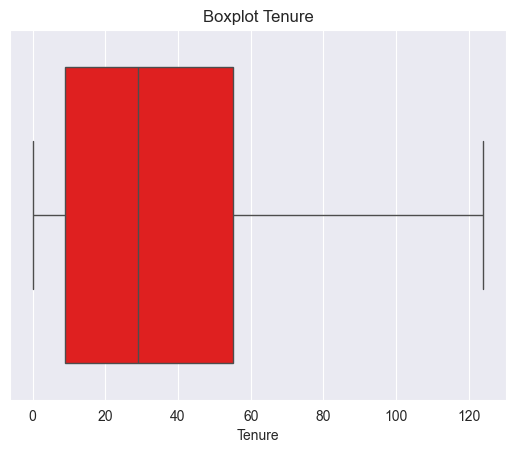

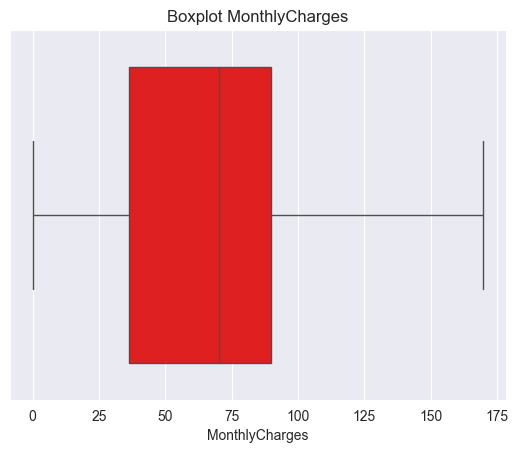

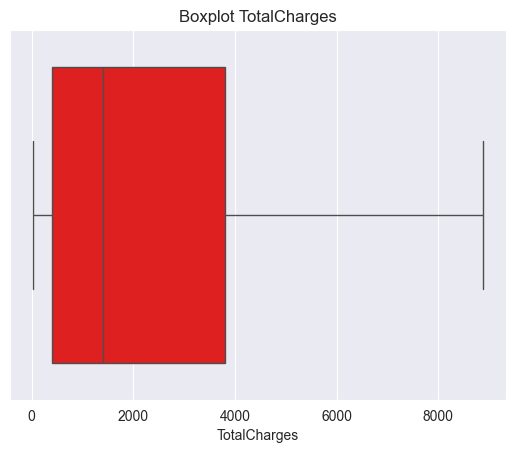

In [60]:
# Viasualisasikan ulang dg boxplot

# Tenure
plt.figure()
sns.boxplot(x=df['tenure'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot Tenure')
plt.xlabel('Tenure')
plt.show()

# MonthlyCharges
plt.figure()
sns.boxplot(x=df['MonthlyCharges'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()

# TotalCharges
plt.figure()
sns.boxplot(x=df['TotalCharges'], color='red', fliersize=8, flierprops={'markerfacecolor': 'r'})
plt.title('Boxplot TotalCharges')
plt.xlabel('TotalCharges')
plt.show()

# Mendeteksi Nilai yang Tidak Standar

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.

In [29]:
#Loop
for col_name in list(df):
	print(f'\nUnique Values Count Before Standardized Variable {col_name}')
	print(df[col_name].value_counts())
	print()


Unique Values Count Before Standardized Variable UpdatedAt
UpdatedAt
202006    7106
202005       7
Name: count, dtype: int64


Unique Values Count Before Standardized Variable customerID
customerID
4.55E+11       18
4.59E+11       13
4.57E+11       12
4.54E+11       10
4.60E+11        9
               ..
45665022680     1
45023517923     1
45184632574     1
45726897364     1
45427332508     1
Name: count, Length: 7017, dtype: int64


Unique Values Count Before Standardized Variable gender
gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: count, dtype: int64


Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5962
1    1151
Name: count, dtype: int64


Unique Values Count Before Standardized Variable Partner
Partner
No     3676
Yes    3437
Name: count, dtype: int64


Unique Values Count Before Standardized Variable Dependents
Dependents
No     4978
Yes    2115
Iya      20
Name: count, dtype: int64


Unique Values Count B

## Melakukan Standarisasi dengan looping

Kita bisa menggunakan fungsi .replace(), Namun, karena variabel yang perlu distandarisasi memiliki jenis isi variabel yang berbeda maka kita gunakan if else

In [34]:
kolom_std = ['gender', 'Dependents', 'Churn']

for col_name in kolom_std:
  print(f"\nStandarisasi Kolom:{col_name}")
  print('Nilai unik sebelum distandarisasi: ')
  print(df[col_name].unique())
  print('\nJumlah nilai unik sebelum distandarisasi: ')
  print(df[col_name].value_counts())


Standarisasi Kolom:gender
Nilai unik sebelum distandarisasi: 
['Female' 'Male' 'Wanita' 'Laki-Laki']

Jumlah nilai unik sebelum distandarisasi: 
gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Standarisasi Kolom:Dependents
Nilai unik sebelum distandarisasi: 
['No' 'Yes' 'Iya']

Jumlah nilai unik sebelum distandarisasi: 
Dependents
No     4978
Yes    2115
Iya      20
Name: count, dtype: int64

Standarisasi Kolom:Churn
Nilai unik sebelum distandarisasi: 
['No' 'Yes' 'Churn' nan]

Jumlah nilai unik sebelum distandarisasi: 
Churn
No       5195
Yes      1866
Churn       9
Name: count, dtype: int64


In [39]:
for col_name in kolom_std:
    if col_name == 'gender':
        mapping = {'Wanita' : 'Female', 'Laki-Laki' : 'Male', 'Famale' : 'Female'}
    elif col_name == 'Dependents':
        mapping = {'Iya' : 'Yes'}
    elif col_name == 'Churn':
        mapping = {'Churn' : 'Yes'}
    else:
        mapping = {}

    df[col_name] = df[col_name].replace(mapping)

for col_name in list(df[['gender', 'Dependents', 'Churn']]):
	print(f'\nUnique Values Count After Standardized Variable {col_name}')
	print(df[col_name].value_counts())
	print()


Unique Values Count After Standardized Variable gender
gender
Male      3587
Female    3526
Name: count, dtype: int64


Unique Values Count After Standardized Variable Dependents
Dependents
No     4978
Yes    2135
Name: count, dtype: int64


Unique Values Count After Standardized Variable Churn
Churn
No     5195
Yes    1875
Name: count, dtype: int64

